In [1]:
import pandas as pd
import numpy as np

from scipy.stats import normaltest
from scipy.stats import shapiro

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
def MAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) 

# 1 Import data

In [5]:
train = pd.read_csv(r'C:\Users\Yevhen\Desktop\pet_prog\data\car_price_train.csv')

1.region - the state in which the ad is posted

2.year - the year the vehicle was manufactured

3.maker - manufacturer concern

4.model - car model

5.condition - technical condition of the vehicle

6.cylinders - number of cylinders in the engine

7.fuel - type of fuel

8.odometer - mileage

9.title_status - vehicle status

10.transmission - type of transmission

11.drive - drive type

12.size - characteristic of the size of the car

13.type - body type

14.paint_color - car color

15.state - state of sale

In [6]:
test = pd.read_csv(r'C:\Users\Yevhen\Desktop\pet_prog\data\car_price_test.csv')

In [7]:
train.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,target
0,portland,2012.0,ford,f-150,NaN,6 cylinders,gas,108410.0,clean,automatic,rwd,NaN,truck,white,or,17995
1,boise,2011.0,lexus,rx350 awd,like new,6 cylinders,gas,146234.0,clean,automatic,4wd,NaN,SUV,white,id,14995
2,milwaukee,2012.0,volkswagen,jetta,good,4 cylinders,diesel,110000.0,clean,manual,fwd,compact,wagon,black,wi,5000
3,fresno,2002.0,ford,f-550 super duty,good,10 cylinders,gas,147848.0,rebuilt,automatic,rwd,full-size,truck,white,ca,16500
4,spokane,2017.0,ram,1500,NaN,NaN,gas,80732.0,clean,automatic,4wd,NaN,pickup,blue,id,30999


In [8]:
test.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,id
0,salem,2019.0,toyota,tacoma,NaN,NaN,gas,46895.0,clean,automatic,4wd,NaN,pickup,white,or,0
1,orlando,2014.0,ford,mustang,NaN,NaN,gas,128910.0,clean,automatic,NaN,NaN,convertible,white,fl,1
2,boston,2002.0,bmw,x5,good,8 cylinders,gas,197000.0,clean,automatic,4wd,full-size,SUV,grey,ma,2
3,kennewick-pasco-richland,2006.0,ford,explorer,fair,NaN,gas,220000.0,clean,automatic,NaN,full-size,SUV,silver,wa,3
4,columbus,2013.0,subaru,legacy premium awd,like new,4 cylinders,gas,87000.0,clean,automatic,4wd,mid-size,sedan,blue,oh,4


# 1.1 Data information

In [9]:
print(f"Train shape is {train.shape}")
print(f"Test shape is {test.shape}")

Train shape is (54888, 16)
Test shape is (27031, 16)


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54888 entries, 0 to 54887
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        54888 non-null  object 
 1   year          54642 non-null  float64
 2   manufacturer  52759 non-null  object 
 3   model         54291 non-null  object 
 4   condition     30989 non-null  object 
 5   cylinders     33133 non-null  object 
 6   fuel          54561 non-null  object 
 7   odometer      54566 non-null  float64
 8   title_status  53759 non-null  object 
 9   transmission  54691 non-null  object 
 10  drive         40149 non-null  object 
 11  size          15793 non-null  object 
 12  type          43640 non-null  object 
 13  paint_color   38566 non-null  object 
 14  state         54888 non-null  object 
 15  target        54888 non-null  int64  
dtypes: float64(2), int64(1), object(13)
memory usage: 6.7+ MB


In [11]:
train.describe()

,year,odometer,target
count,54642.000000,5.456600e+04,5.488800e+04
mean,2010.782292,1.010761e+05,1.643329e+05
std,9.338066,2.059621e+05,2.106862e+07
min,1910.000000,0.000000e+00,1.010000e+02
25%,2008.000000,4.437500e+04,7.000000e+03
50%,2013.000000,9.134250e+04,1.399900e+04
75%,2016.000000,1.359540e+05,2.569825e+04
max,2022.000000,1.000000e+07,3.736929e+09


In [12]:
train.nunique()

region             30
year              100
manufacturer       41
model            9770
condition           6
cylinders           8
fuel                5
odometer        28876
title_status        6
transmission        3
drive               3
size                4
type               13
paint_color        12
state              22
target           6079
dtype: int64

# 2 Exploratory data analysis

# 2.1 Target

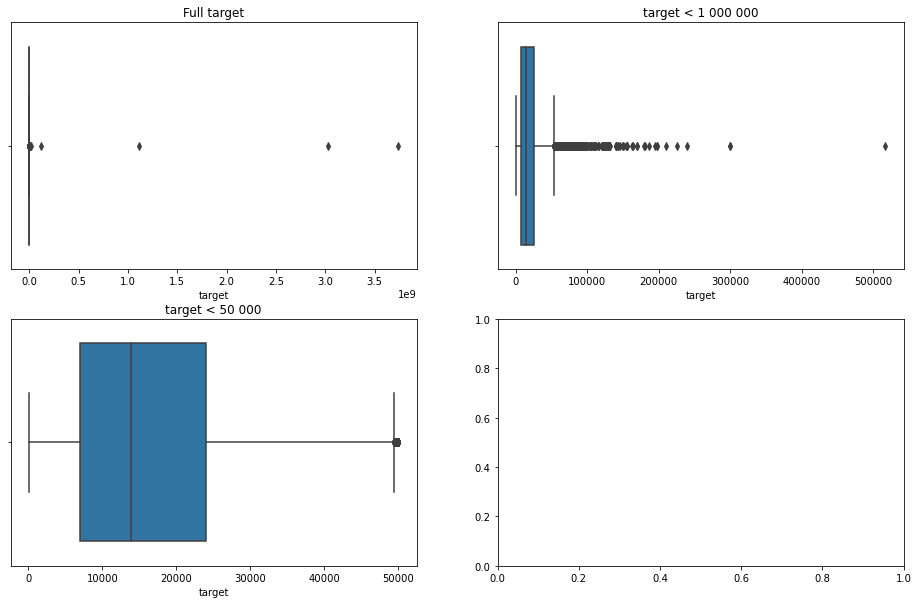

In [13]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16,10))
ax1 = sns.boxplot(train.target, ax = axes[0,0])
ax2 = sns.boxplot(train[train.target < 1e6].target, ax = axes[0,1])
ax3 = sns.boxplot(train[train.target < 5e4].target, ax = axes[1,0])

ax1.title.set_text('Full target')
ax2.title.set_text('target < 1 000 000')
ax3.title.set_text('target < 50 000')

In [14]:
train[train.target > 1e6].target

3050      123456789
5676        1111111
6944       17000000
16424    1111111111
17087       6995495
42844    3736928711
49622    3024942282
49956       1111111
Name: target, dtype: int64

In [15]:
len((train[train.target > 50000].target))

1890

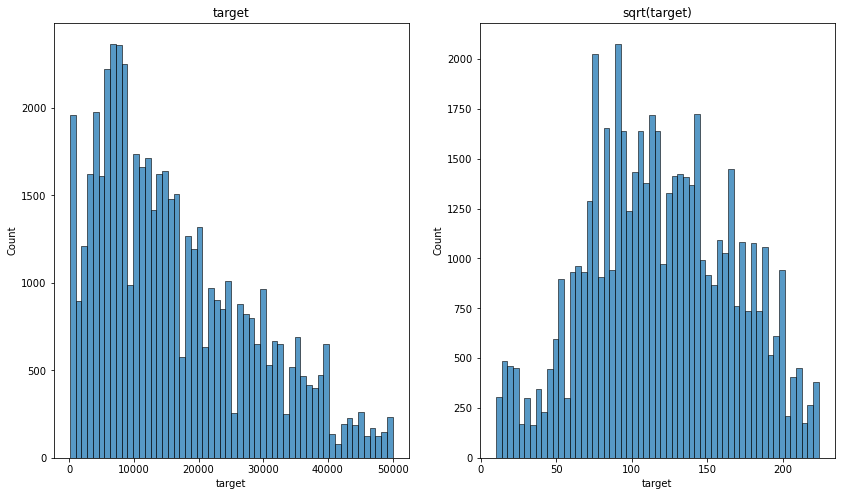

In [119]:
fig, axes = plt.subplots(ncols=2, figsize = (14,8))

ax1 = sns.histplot(train[train.target < 50000].target, ax = axes[0])
ax2 = sns.histplot(np.sqrt(train[train.target < 50000].target), ax = axes[1])
ax1.title.set_text('target')
ax2.title.set_text('sqrt(target)')

In [17]:
normaltest(np.sqrt(train[train.target < 50000].target))

NormaltestResult(statistic=1981.1172439505829, pvalue=0.0)

In [18]:
shapiro(np.sqrt(train[train.target < 50000].target))

ShapiroResult(statistic=0.989332377910614, pvalue=0.0)

**Not normal distribution**

# 2.2 Odometer

In [19]:
train['odometer'].quantile(0.95)

203043.5

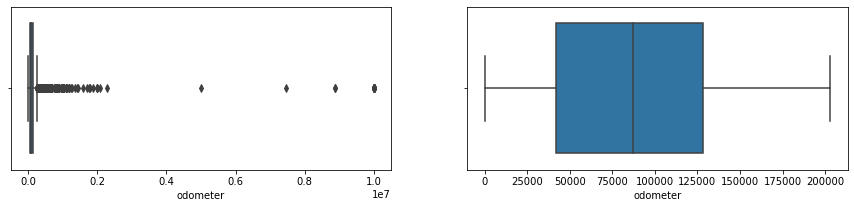

In [20]:
fig, axes = plt.subplots(ncols=2, figsize = (15, 3))

sns.boxplot(train.odometer, ax = axes[0])
sns.boxplot(train[train['odometer'] < 203043].odometer, ax = axes[1])

# 2.3 Year

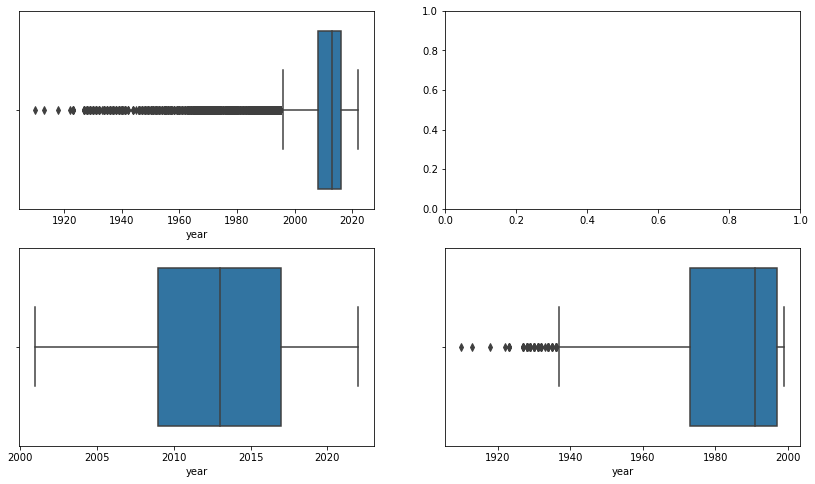

In [21]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (14, 8))

sns.boxplot(train.year, ax = axes[0,0])
sns.boxplot(train[train['year'] > 2000].year , ax = axes[1,0])
sns.boxplot(train[train['year'] < 2000].year, ax = axes[1,1])

In [22]:
less_than_2000 = len(train[train.year < 2000].year)
more_than_2000 = len(train[train.year > 2000].year)

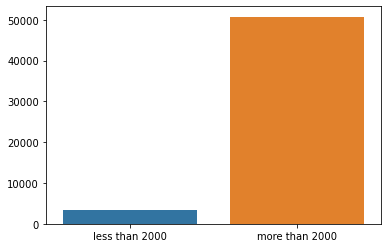

In [23]:
sns.barplot(x = ['less than 2000','more than 2000'], y = [less_than_2000, more_than_2000])

In [24]:
print(f'Number of years less than 2000: {less_than_2000}') 
print(f'Number of years is more than 2000: {more_than_2000}') 


Number of years less than 2000: 3348
Number of years is more than 2000: 50751


# 3.3 Mode in Columns 

In [25]:
MOST_POPULAR = {}

In [26]:
for column in train.columns.drop('target', 1):
    MOST_POPULAR[column] = train[column].value_counts().index[0]

In [27]:
MOST_POPULAR

{'region': 'columbus',
 'year': 2017.0,
 'manufacturer': 'ford',
 'model': 'f-150',
 'condition': 'excellent',
 'cylinders': '6 cylinders',
 'fuel': 'gas',
 'odometer': 1.0,
 'title_status': 'clean',
 'transmission': 'automatic',
 'drive': '4wd',
 'size': 'full-size',
 'type': 'sedan',
 'paint_color': 'white',
 'state': 'ca'}

# 3.4 State

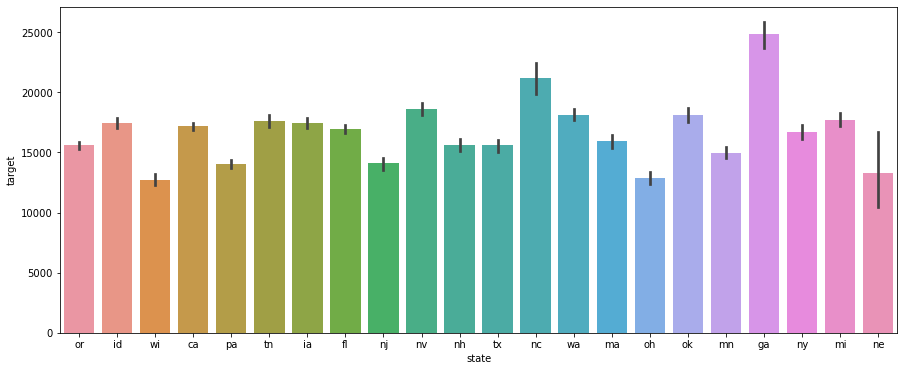

In [28]:
plt.figure(figsize = (15,6))
sns.barplot(x = train.state.dropna(), y = train[train.target < 50000].target)

In [29]:
number_of_sales = {}

for state in train.state.dropna().unique():
    number_of_sales[state] = len(train[train['state'] == state])

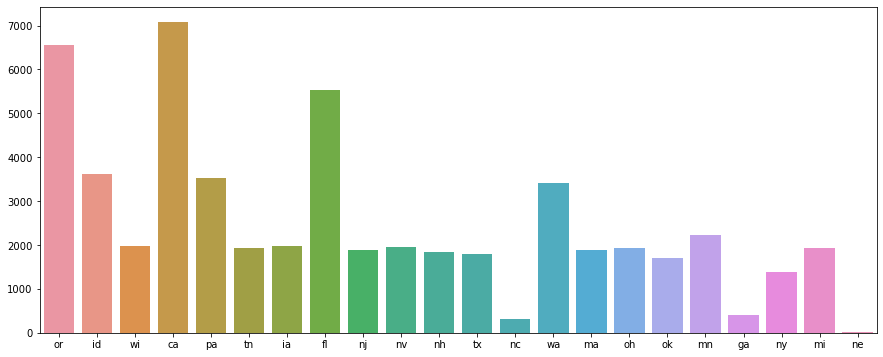

In [30]:
plt.figure(figsize = (15,6))

sns.barplot(x = list(number_of_sales.keys()), y = list(number_of_sales.values()))

In [31]:
train.state.value_counts()

ca    7076
or    6560
fl    5524
id    3624
pa    3530
wa    3414
mn    2220
wi    1988
ia    1985
nv    1947
mi    1939
tn    1937
oh    1924
nj    1893
ma    1892
nh    1830
tx    1793
ok    1698
ny    1385
ga     411
nc     308
ne      10
Name: state, dtype: int64

**Georgia spent the most money**
 and **the largest number of sales in California**

# 3. Corr

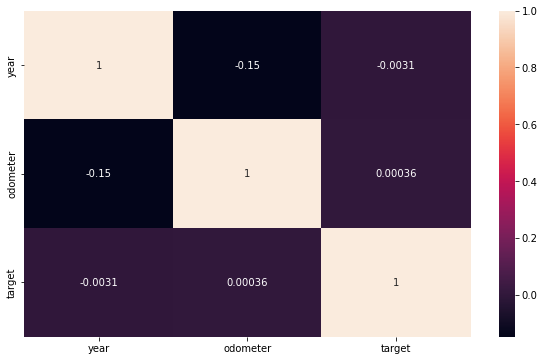

In [32]:
plt.figure(figsize = (10, 6))
sns.heatmap(train[['year','odometer','target']].corr(), annot=True)

# 3 Feature engineering and data processing

**I chose the values that I think are correct for filling in the NUL elements**

In [33]:
characteristics = {
 'region': 'columbus',
 'year': 2013,
 'manufacturer': "n",
 'model': "n",
 'condition': "n",
 'cylinders': '6 cylinders',
 'fuel': 'gas',
 'odometer': 100000,
 'title_status': 'clean',
 'transmission': 'automatic',
 'drive': 'fwd',
 'size': "n",
 'type': 'sedan',
 'paint_color': 'n',
 'state': 'ca'
}

In [7]:
def data_processing(data, characteristics_for_nun_elems, train = True):
    """
    Processes and cleanse data cars.
    Fills NULL elements with the specified statistics and removes anomalies
    
    -----------------------------------------------------------------------
    Input:
        data - data to be cleared
        characteristics_for_nun_elems - statistics that will fill NULL elements
        train - indicates sample is for training or test
    
    -----------------------------------------------------------------------
    Output:
        If train = True:
            return X, y
            
        If train = False:
        return X
    """
    for column in characteristics_for_nun_elems:
        data[column] = data[column].fillna(characteristics_for_nun_elems[column])
    
    
    if train is True:
        data = data[data.year > 2000]
        data = data[data.target < 49000]
        data = data[data.odometer < 203043]
    
        return data.drop('target', 1), data.target
    else:
        return data
    
    

In [8]:
def data_processing_XGBOOST(data):
    """
    All columns of type "object" will be converted to dummies column view.
    
    -----------------------------------------------------------------------
    Input:
        data - data that will change
        
    -----------------------------------------------------------------------
    Output:
        dummies_data - changed date
        
    """
    object_columns = []
    numeric_columns = []

    for column in data.columns:
        if train[column].dtype == "object":
            object_columns.append(column)
        else:
            numeric_columns.append(column)
    
    dummies_data = pd.get_dummies(data[object_columns])
    dummies_data[numeric_columns] = data[numeric_columns]

    print(f"Shape data is {dummies_data.shape}")
    return dummies_data
    

# 4 Modeling

In [36]:
x,y = data_processing(train, characteristics)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x,y , test_size = 0.25)

# 4.1 Baseline Catboost

In [38]:
cat_features = [0,2,3,4,5,6,8,9,10,11,12,13,14]

In [39]:
CBR = CatBoostRegressor(cat_features=cat_features,  task_type='GPU')

In [4]:
# CBR.fit(X_train, y_train)

In [41]:
pred_baseline = CBR.predict(X_test)

In [42]:
MAE_baseline = MAE(y_test, pred_baseline).round(2)
RMSE_baseline = np.sqrt(MSE(y_test, pred_baseline)).round(2)
MAPE_baseline = MAPE(y_test, pred_baseline).round(2)

In [43]:
score_df = pd.DataFrame(columns = ['Model_name', 'MAE', 'RMSE', 'MAPE'])

In [44]:
score_df = score_df.append({'Model_name' : 'baseline_catboost' , 
                            'MAE' : MAE_baseline, 
                            'RMSE' : RMSE_baseline, 
                            'MAPE' : MAPE_baseline}, ignore_index=True)

# 4.2 Best parameters Catboost

In [46]:
parameters_grid_catboost = {
    'iterations' : [500, 1000, 1500, 2000],
    'learning_rate' : [0.01, 0.05, 0.1],
    'depth' : [4,5,6]
}

In [47]:
CBR = CatBoostRegressor(cat_features=cat_features,  task_type='GPU')

In [48]:
GS_CBR = GridSearchCV(CBR, parameters_grid_catboost)

In [49]:
#GS_CBR.fit(X_train,y_train)

In [74]:
best_params_catboost = {'depth': 6, 'iterations': 2000, 'learning_rate': 0.1}

In [68]:
CBR = CatBoostRegressor(**best_params_catboost, cat_features=cat_features,  task_type='GPU')

In [5]:
# CBR.fit(X_train,y_train)

In [70]:
pred_bestparams = CBR.predict(X_test)

In [71]:
MAE_bestparams = MAE(y_test, pred_bestparams).round(2)
RMSE_bestparams = np.sqrt(MSE(y_test, pred_bestparams)).round(2)
MAPE_bestparams = MAPE(y_test, pred_bestparams).round(2)

In [72]:
score_df = score_df.append({'Model_name' : 'best_params_catboost' , 
                            'MAE' : MAE_bestparams, 
                            'RMSE' : RMSE_bestparams, 
                            'MAPE' : MAPE_bestparams}, ignore_index=True)

# 4.3 Baseline XGBoost 

In [79]:
Xb,yb = data_processing(train, characteristics)

In [80]:
Xb_trans = data_processing_XGBOOST(Xb)

Shape data is (46856, 8042)


In [81]:
Xb_trans_train = Xb_trans.iloc[: 35142]
yb_train = yb.iloc[: 35142]

Xb_trans_test = Xb_trans.iloc[35142 :]
yb_test = yb.iloc[35142 :]

In [82]:
test_XGB = XGBRegressor( n_jobs = -1)

In [83]:
test_XGB.fit(Xb_trans_train, yb_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [84]:
test_XGB_pred = test_XGB.predict(Xb_trans_test)

In [85]:
MAE_bestparams = MAE(yb_test, test_XGB_pred).round(2)
RMSE_bestparams = np.sqrt(MSE(yb_test, test_XGB_pred)).round(2)
MAPE_bestparams = MAPE(yb_test, test_XGB_pred).round(2)

In [86]:
score_df = score_df.append({'Model_name' : 'baseline_XGB' , 
                            'MAE' : MAE_bestparams, 
                            'RMSE' : RMSE_bestparams, 
                            'MAPE' : MAPE_bestparams}, ignore_index=True)

# 4.4 Best parameters XGBoost

In [88]:
parameters_grid_XGB = {
    'n_estimators' : [100, 150],
    'learning_rate' : [0.3, 0.5],
    'max_depth' : [5,6]
}

In [89]:
XGB = XGBRegressor( n_jobs = -1)

In [90]:
PG_XGB = GridSearchCV(XGB, parameters_grid_XGB, cv = 3)

In [91]:
PG_XGB.fit(Xb_trans_train, yb_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=-1,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
         

In [92]:
PG_XGB.best_params_

{'learning_rate': 0.5, 'max_depth': 6, 'n_estimators': 150}

In [94]:
XGB = XGBRegressor(**PG_XGB.best_params_, n_jobs = -1)

In [95]:
XGB.fit(Xb_trans_train,yb_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.5, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=150, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [96]:
XGB_pred = XGB.predict(Xb_trans_test)

In [102]:
MAE_bestparams = MAE(yb_test, XGB_pred).round(2)
RMSE_bestparams = np.sqrt(MSE(yb_test, XGB_pred)).round(2)
MAPE_bestparams = MAPE(yb_test, XGB_pred).round(2)

In [103]:
score_df = score_df.append({'Model_name' : 'bestparams_XGB' , 
                            'MAE' : MAE_bestparams, 
                            'RMSE' : RMSE_bestparams, 
                            'MAPE' : MAPE_bestparams}, ignore_index=True)

# 4.5 Final scores

In [104]:
score_df 

,Model_name,MAE,RMSE,MAPE
0,baseline_catboost,3677.79,5522.95,1.49
1,best_params_catboost,3657.40,5478.75,1.45
2,baseline_XGB,3812.97,5648.36,1.73
3,bestparams_XGB,3613.71,5406.81,1.57


# 5 Predict

In [106]:
cat_features = [0,2,3,4,5,6,8,9,10,11,12,13,14]

In [110]:
best_params_catboost = {'depth': 6, 'iterations': 2000, 'learning_rate': 0.1}

In [111]:
CBR = CatBoostRegressor(**best_params_catboost, cat_features=cat_features,  task_type='GPU')

In [112]:
x,y = data_processing(train, characteristics)

In [6]:
# CBR.fit(x,y)

In [114]:
score = test[['id']]

In [116]:
score['price'] = CBR.predict(data_processing(test.drop('id',1),characteristics, False)).round()

In [117]:
score

,id,price
0,0,40157.0
1,1,15401.0
2,2,3428.0
3,3,1516.0
4,4,8450.0
...,...,...
27026,27030,4286.0
27027,27031,14303.0
27028,27032,7800.0
27029,27033,22020.0


In [118]:
score.to_csv('res.csv')